> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [24]:
df = pd.read_csv('tmdb-movies (1).csv')
df.head(1)

df.info()
df.describe()
# Compute data contin null value 
df.isna().sum()
# replace null value with Zero
df.fillna(0)
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# remove duplicaute
sum(df.duplicated())
#After calculating the duplicate row we can drop these row using 'drop_duplicates()' function
df.drop_duplicates(inplace = True)
#afetr removing duplicate value from the dataset
print("Afetr Removing Duplicate Values (Rows,Columns) : ",df.shape)

Afetr Removing Duplicate Values (Rows,Columns) :  (10865, 21)


In [13]:
#we can see that 21 columns in the dataset, We can drop them using drop function.
df.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'],axis =1,inplace = True)
print("Afetr Removing Unused Columns (Rows,Columns) : ",df.shape)

Afetr Removing Unused Columns (Rows,Columns) :  (10865, 15)


In [15]:
# Checking for an zero values in the budget and revenue columns
print("Rows With Zero Values In The Budget Column:",df[(df['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",df[(df['revenue']==0)].shape[0])

Rows With Zero Values In The Budget Column: 5696
Rows With Zero Values In The Revenue Column: 6016


In [28]:
# Research Question 1 (Replace this header name
Which Movie Has The Highest Or Lowest Profit?

df['Profit'] = df['revenue'] - df['budget']




def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = df[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",df['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('Profit')

Object `Profit` not found.
Movie Which Has Highest Profit :  Avatar
Movie Which Has Lowest Profit  :  The Warrior's Way


,1386,2244
id,19995,46528
imdb_id,tt0499549,tt1032751
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
homepage,http://www.avatarmovie.com/,http://www.iamrogue.com/thewarriorsway
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.


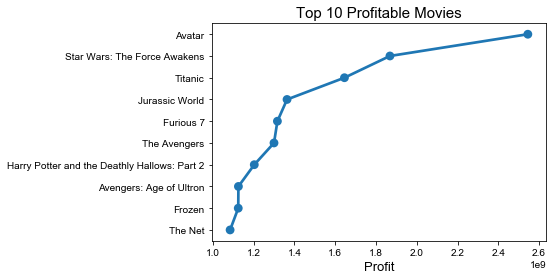

In [29]:
info = pd.DataFrame(df['Profit'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['Profit'][:10])

#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")

### Research Question 2  (Replace this header name!)

In [30]:
Movie with Highest And Lowest Budget?
df['budget'] = df['budget'].replace(0,np.NAN)
find_minmax('budget')



Object `Budget` not found.
Movie Which Has Highest budget :  The Warrior's Way
Movie Which Has Lowest budget  :  Fear Clinic


,2244,1151
id,46528,287524
imdb_id,tt1032751,tt2165765
popularity,0.25054,0.177102
budget,4.25e+08,1
revenue,11087569,0
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
homepage,http://www.iamrogue.com/thewarriorsway,http://www.fearclinicmovie.com/
director,Sngmoo Lee,Robert Hall
tagline,Assassin. Hero. Legend.,NaN


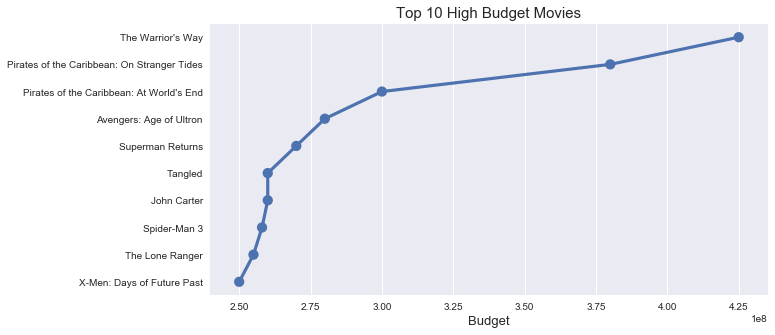

In [32]:
info = pd.DataFrame(df['budget'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")

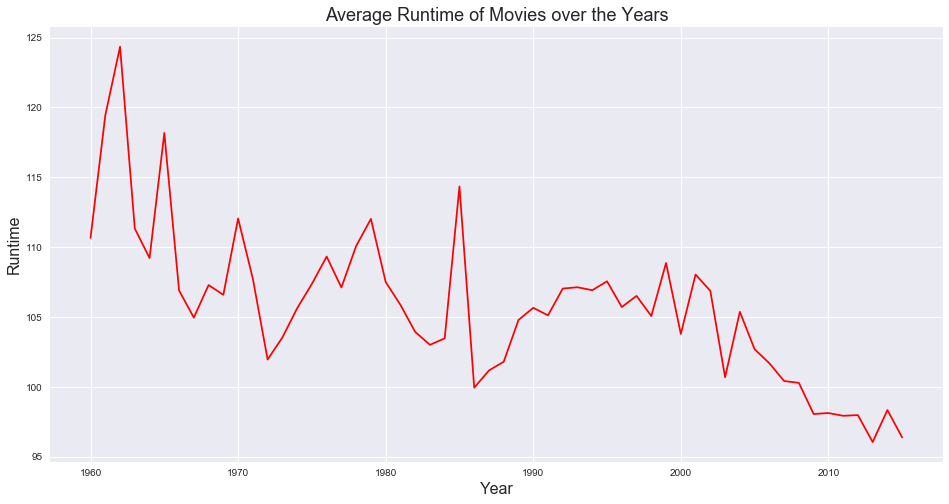

In [38]:
df.groupby('release_year')['runtime'].mean().plot(kind='line', figsize = (16, 8), color = 'r')
plt.title('Average Runtime of Movies over the Years', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Runtime', fontsize = 16);

In [39]:
#Question 4 : Movie with Largest And Lowest Earned Revenue?
find_minmax('revenue')

Movie Which Has Highest revenue :  Avatar
Movie Which Has Lowest revenue  :  Wild Card


,1386,48
id,19995,265208
imdb_id,tt0499549,tt2231253
popularity,9.43277,2.93234
budget,2.37e+08,3e+07
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
homepage,http://www.avatarmovie.com/,NaN
director,James Cameron,Simon West
tagline,Enter the World of Pandora.,Never bet against a man with a killer hand.


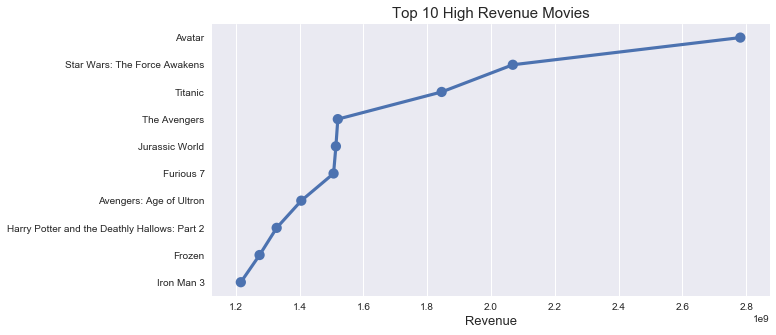

In [40]:
#top 10 movies which made highest revenue.
#sort the 'revenue' column in decending order and store it in the new dataframe.
info = pd.DataFrame(df['revenue'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 movies with high revenue data from the list and dataframe.
x = list(data[:10])
y = list(info['revenue'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Revenue Movies",fontsize = 15)
ax.set_xlabel("Revenue",fontsize = 13)
sns.set_style("darkgrid")

In [41]:
# Movie with Longest And Shortest Rintime?
df['runtime'] = df['runtime'].replace(0,np.NAN)
find_minmax('runtime')

Movie Which Has Highest runtime :  The Story of Film: An Odyssey
Movie Which Has Lowest runtime  :  Fresh Guacamole


,3894,4883
id,125336,142563
imdb_id,tt2044056,tt2309977
popularity,0.006925,0.078472
budget,NaN,NaN
revenue,0,0
original_title,The Story of Film: An Odyssey,Fresh Guacamole
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,NaN
homepage,http://www.channel4.com/programmes/the-story-o...,NaN
director,Mark Cousins,PES
tagline,NaN,NaN


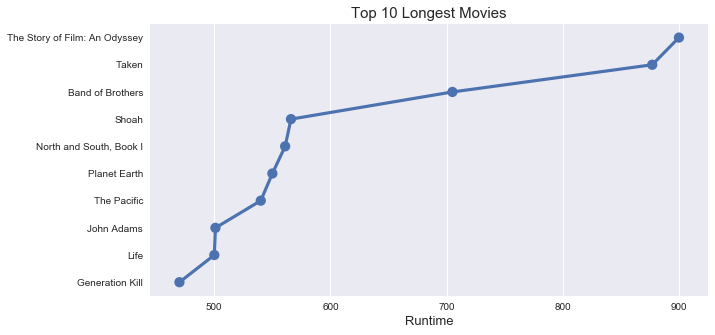

In [42]:
info = pd.DataFrame(df['runtime'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 longest duraton movies data from the list and dataframe.
x = list(data[:10])
y = list(info['runtime'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Longest Movies",fontsize = 15)
ax.set_xlabel("Runtime",fontsize = 13)
sns.set_style("darkgrid")

# Conclusions
Drama is the most popular genre, following by action, comedy and thriller.
Drame, Comedy, Thriller and Action are four most-made genres.
Maximum Number Of Movies Release In year 2014.
'Avatar', 'Star Wars' and 'Titanic' are the most profitable movies.
Short or Long duration movies are more popular than long duration movies.
Average runtime of the movies are decreasing year by year.
May,june,november and december are most popular month for releasing movies, if you want to earn more profit.
Revenue is directly connected to the budget.
Warner Bros, Universal Pictures and Paramount Pictures production companies earn more life time profit than other production companies.
Director must be one or more of, Steven Spielberg, Robert Zemeckis, Clint Eastwood, Tim Burton or Ridley Scott.
Production company must be one or more of, Universal Pictures, Warner Bros., Paramount Pictures, Twentieth Century Fox Film Corporation or Columbia Pictures.
The budget of the movie must be around $60 million